# Homework - Juan Pablo Rodríguez Bonilla

Using Pandas and Statsmodels write a Jupyter Notebook that: 

1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a ``pull request`` to the course's github repository.

## Country-level data economic data
* [World Bank](https://data.worldbank.org/) provides all kinds of socio-economic data.
* [Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/) is a database with information on relative levels of income, output, input and productivity, covering 182 countries between 1950 and 2017.
* [Maddison Historical Data](http://www.ggdc.net/maddison/oriindex.htm) provides the most used historical statistics on population and GDP
* [The Maddison Project Database](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018) provides information on comparative economic growth and income levels over the very long run,  follow-up to Maddison. 
* [Comparative Historical National Accounts ](https://www.rug.nl/ggdc/historicaldevelopment/na/) provides information on Gross Domestic Product, including an industry breakdown, for the 19th and 20th centuries. 
* [Human Mortality Database](https://www.mortality.org/) provides detailed mortality and population data for the world for the last two centuries.

Note: Before I start, you should know that databases were altered externaly and for all the code to work you should use the folder data1 that is also on the pullrequest. If that is not done, for the code to work you should alter the databases externaly yourself in the same way that I did.

## 1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 

In [1]:
# Let's import pandas and some other basic packages we will use 
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import urllib
import os

pathout = './data1/'

if not os.path.exists(pathout):
    os.mkdir(pathout) #si no existe data crea un path
    
pathgraphs = './graphs1/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [3]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

In [4]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta') #le digo que importe los datos del directorio indicado
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')#bajar datos de una pagina de internet
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117) #exporto donde yo quiero (version=117 dice que esta trabajando en stata 14, 15 o 16)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)#write_index=false significa que no quiero que cree una variable index sino que es el numero de la observacion
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [5]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls') #guardar la data que esta en el link y exportarla a eso

In [6]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop

,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [7]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]
maddison_old_pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [8]:
pop = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)
pop = pop.dropna(subset=['pop_1'])
pop = pop.loc[2:]
pop['Country'] = pop.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
pop = pop.loc[pop.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
pop = pop.dropna(axis=1, how='any')
pop #lo que se hizo aqui fue juntar todo en las regiones en vez de por paises

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [9]:
pop = pd.wide_to_long(pop, ['pop_'], i='Country', j='year').reset_index() # wide ---> long
pop

,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
...,...,...,...
499,East Europe,2030,113555
500,Latin America,2030,724465
501,Asia,2030,4.91693e+06
502,Africa,2030,1.51743e+06


In [10]:
pop2 = pop.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum') #otra forma de reshape
pop2

Country,Africa,Asia,East Europe,Latin America,Western Europe,Western Offshoots,World
year,,,,,,,
1,17000.000,1.684000e+05,4750.000,5600.000,25050.000,1120.0,2.258200e+05
1000,32300.000,1.826000e+05,6500.000,11400.000,25560.000,1870.0,2.673300e+05
1500,46610.000,2.838000e+05,13500.000,17500.000,57268.000,2800.0,4.384280e+05
1600,55320.000,3.785000e+05,16950.000,8600.000,73778.000,2300.0,5.561480e+05
1700,61080.000,4.018000e+05,18800.000,12050.000,81460.000,1750.0,6.034900e+05
...,...,...,...,...,...,...,...
2006,931486.521,3.882964e+06,120463.680,565415.973,399607.161,355678.0,6.540214e+06
2007,952787.083,3.927514e+06,120378.032,572829.964,400512.458,358548.0,6.616689e+06
2008,974527.690,3.972154e+06,120274.466,580217.248,401352.880,362621.0,6.694832e+06


Text(0, 0.5, 'Population')

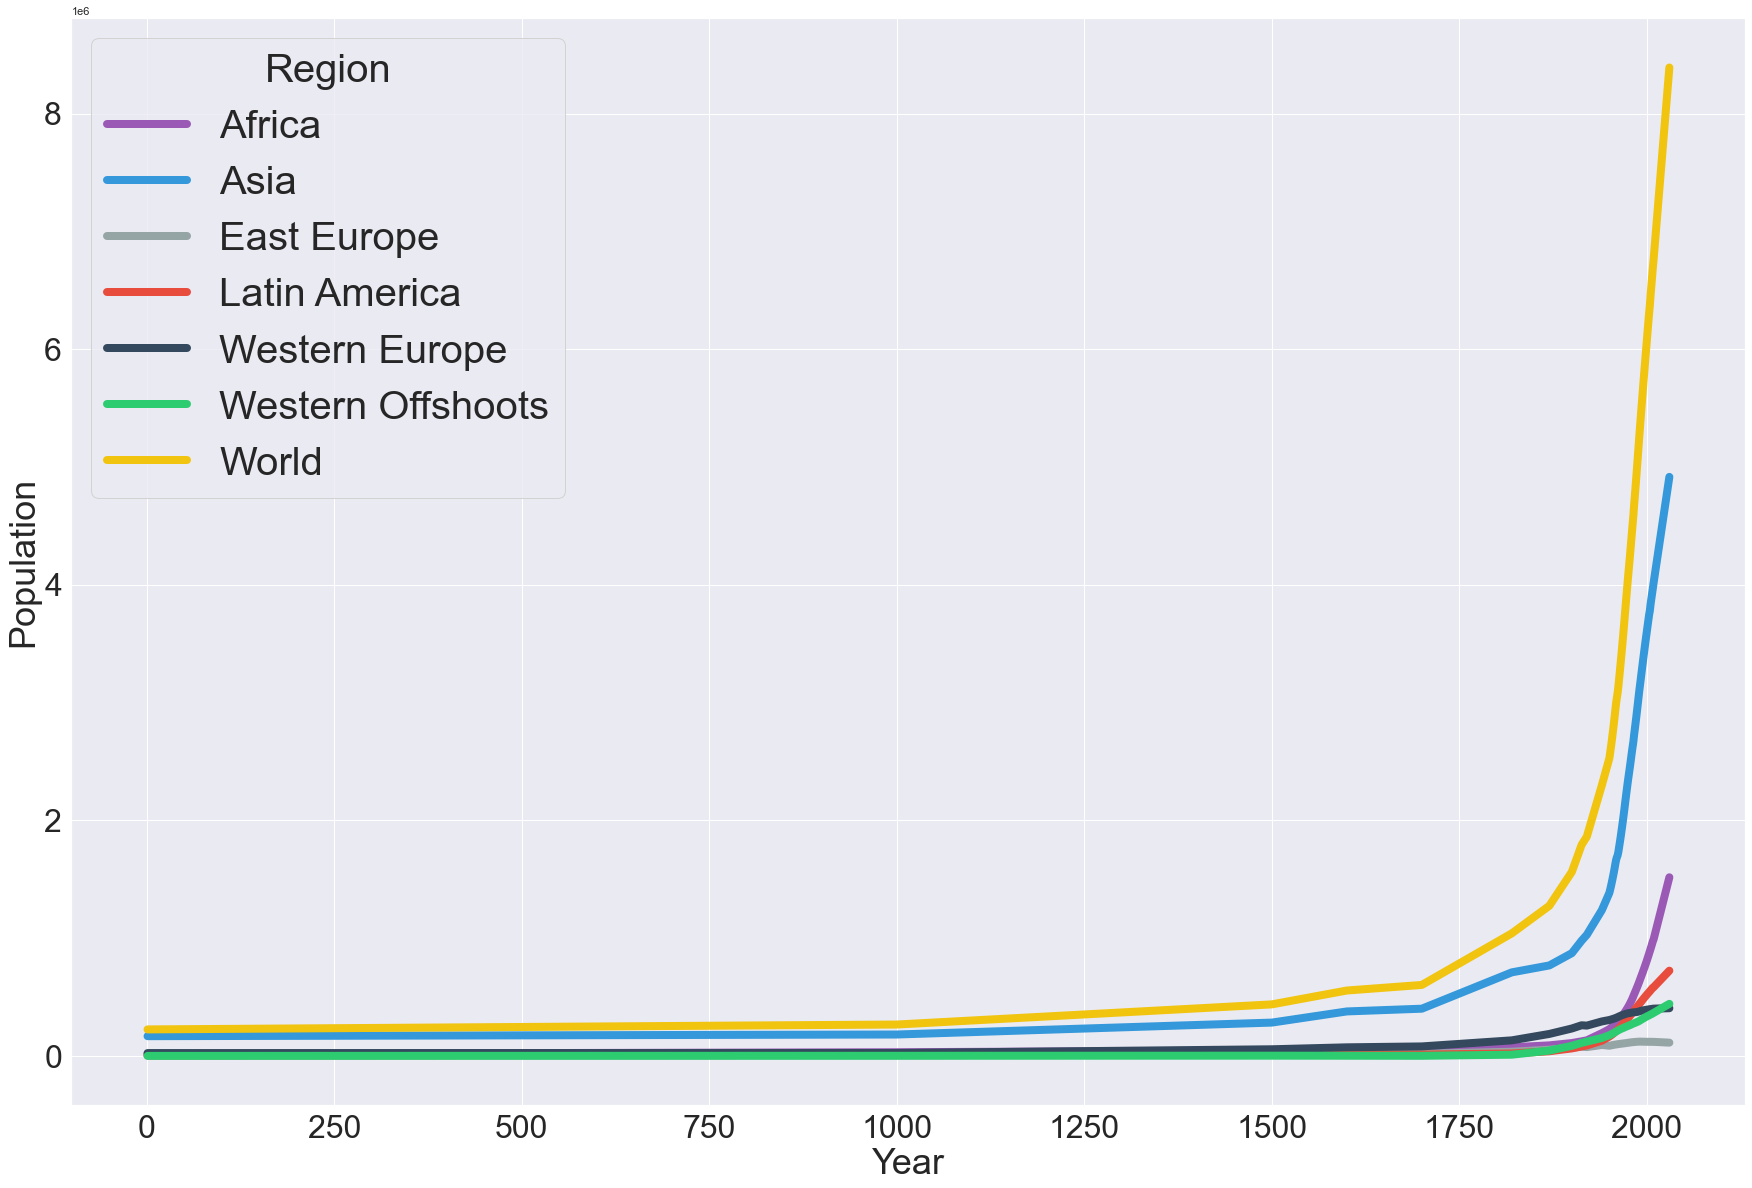

In [11]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f1c40f"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
pop2.loc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Population', fontsize=36)

## 2. Plots the evolution of the share of the world population by countries and WB regions.

In [12]:
if not os.path.exists(pathout + 'WB_pop.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'WB_pop.xls')

In [13]:
wb_pop = pd.read_excel(pathout + 'WB_pop.xls', sheet_name="Data", skiprows=3)
wb_pop

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,91401764,92232738,93009498,93840016,94715795,95440988,96146336,97043270,97884022,...,104800475,104421447,104174038,103935318,103713726,103496179,103257886,102994479,102738854,102530626
1,Caribbean small states,4194710,4274060,4353628,4432217,4508198,4580374,4648367,4712526,4773902,...,6925452,6973206,7022387,7072665,7123332,7173435,7222212,7269386,7314990,7358965
2,East Asia & Pacific,1040958103,1044544622,1059018809,1084796352,1110214377,1136691455,1166600015,1195269923,1224531259,...,2192059415,2206884624,2221673110,2236819053,2252046977,2267482299,2282855831,2298486142,2314097713,2328138066
3,Europe & Central Asia,666753314,674450648,682397793,690411689,698355562,706070485,712830280,719406036,725725288,...,884469337,887926760,890162680,893786649,898066267,902415636,906721013,910940725,914626123,917973802
4,European Union,356906076,359998418,363200473,366516491,369850244,373032732,376039119,378917977,381605443,...,440917800,441532412,440746976,441395932,442469471,443576663,444543759,445485081,446132239,446786293
5,Latin America & Caribbean,219907801,225993884,232265533,238696012,245233432,251850859,258538106,265295652,272128513,...,583746102,590303295,596966199,603586217,610151927,616619613,622986033,629240066,635372515,641357466
6,Middle East & North Africa,105203269,108061812,111045434,114101592,117271166,120541214,123908159,127444958,131026912,...,377883993,385917886,393944527,401974219,409977874,417932242,425821770,433597626,441255234,448912959
7,North America,198624409,202007500,205198600,208253700,211262900,214031100,216659000,219176000,221503000,...,340466060,343391679,345960766,348610010,351141670,353803582,356403310,359115353,361592734,363809239
8,South Asia,572839523,584939726,597494449,610498327,623943332,637823175,652144182,666908582,682102178,...,1615610198,1638792934,1661534412,1683747130,1705772050,1727640967,1749417068,1771167194,1792835608,1814388744
9,Sub-Saharan Africa,227233223,232567038,238121698,243893426,249873743,256059811,262454422,269072224,275937224,...,845655214,869025106,893046172,917726973,943041070,968959787,995458478,1022526541,1050153672,1078306520


In [14]:
wb_pop.columns = ['Country Name'] + ['pop_'+str(col) for col in wb_pop.columns[1:]]

wb_pop

,Country Name,pop_1960,pop_1961,pop_1962,pop_1963,pop_1964,pop_1965,pop_1966,pop_1967,pop_1968,...,pop_2009,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
0,Central Europe and the Baltics,91401764,92232738,93009498,93840016,94715795,95440988,96146336,97043270,97884022,...,104800475,104421447,104174038,103935318,103713726,103496179,103257886,102994479,102738854,102530626
1,Caribbean small states,4194710,4274060,4353628,4432217,4508198,4580374,4648367,4712526,4773902,...,6925452,6973206,7022387,7072665,7123332,7173435,7222212,7269386,7314990,7358965
2,East Asia & Pacific,1040958103,1044544622,1059018809,1084796352,1110214377,1136691455,1166600015,1195269923,1224531259,...,2192059415,2206884624,2221673110,2236819053,2252046977,2267482299,2282855831,2298486142,2314097713,2328138066
3,Europe & Central Asia,666753314,674450648,682397793,690411689,698355562,706070485,712830280,719406036,725725288,...,884469337,887926760,890162680,893786649,898066267,902415636,906721013,910940725,914626123,917973802
4,European Union,356906076,359998418,363200473,366516491,369850244,373032732,376039119,378917977,381605443,...,440917800,441532412,440746976,441395932,442469471,443576663,444543759,445485081,446132239,446786293
5,Latin America & Caribbean,219907801,225993884,232265533,238696012,245233432,251850859,258538106,265295652,272128513,...,583746102,590303295,596966199,603586217,610151927,616619613,622986033,629240066,635372515,641357466
6,Middle East & North Africa,105203269,108061812,111045434,114101592,117271166,120541214,123908159,127444958,131026912,...,377883993,385917886,393944527,401974219,409977874,417932242,425821770,433597626,441255234,448912959
7,North America,198624409,202007500,205198600,208253700,211262900,214031100,216659000,219176000,221503000,...,340466060,343391679,345960766,348610010,351141670,353803582,356403310,359115353,361592734,363809239
8,South Asia,572839523,584939726,597494449,610498327,623943332,637823175,652144182,666908582,682102178,...,1615610198,1638792934,1661534412,1683747130,1705772050,1727640967,1749417068,1771167194,1792835608,1814388744
9,Sub-Saharan Africa,227233223,232567038,238121698,243893426,249873743,256059811,262454422,269072224,275937224,...,845655214,869025106,893046172,917726973,943041070,968959787,995458478,1022526541,1050153672,1078306520


In [15]:
wb_pop = pd.wide_to_long(wb_pop, ['pop_'], i='Country Name', j='year').reset_index() # wide ---> long
wb_pop

,Country Name,year,pop_
0,Central Europe and the Baltics,1960,91401764
1,Caribbean small states,1960,4194710
2,East Asia & Pacific,1960,1040958103
3,Europe & Central Asia,1960,666753314
4,European Union,1960,356906076
...,...,...,...
644,Middle East & North Africa,2018,448912959
645,North America,2018,363809239
646,South Asia,2018,1814388744
647,Sub-Saharan Africa,2018,1078306520


In [16]:
wb_pop2 = wb_pop.pivot_table(index='year',columns='Country Name',values='pop_',aggfunc='sum') #otra forma de reshape
wb_pop2

Country Name,Caribbean small states,Central Europe and the Baltics,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,World
year,,,,,,,,,,,
1960,4194710,91401764,1040958103,666753314,356906076,219907801,105203269,198624409,572839523,227233223,3031519642
1961,4274060,92232738,1044544622,674450648,359998418,225993884,108061812,202007500,584939726,232567038,3072565230
1962,4353628,93009498,1059018809,682397793,363200473,232265533,111045434,205198600,597494449,238121698,3125542316
1963,4432217,93840016,1084796352,690411689,366516491,238696012,114101592,208253700,610498327,243893426,3190651098
1964,4508198,94715795,1110214377,698355562,369850244,245233432,117271166,211262900,623943332,249873743,3256154512
1965,4580374,95440988,1136691455,706070485,373032732,251850859,120541214,214031100,637823175,256059811,3323068099
1966,4648367,96146336,1166600015,712830280,376039119,258538106,123908159,216659000,652144182,262454422,3393134164
1967,4712526,97043270,1195269923,719406036,378917977,265295652,127444958,219176000,666908582,269072224,3462573375
1968,4773902,97884022,1224531259,725725288,381605443,272128513,131026912,221503000,682102178,275937224,3532954374


In [17]:
wb_pop2.rename(columns={'Caribbean small states':"Caribbean_small_states"}, inplace=True)
wb_pop2.rename(columns={'Central Europe and the Baltics':"Central_Europe_and_the_Baltics"}, inplace=True)
wb_pop2.rename(columns={'East Asia & Pacific':"East_Asia_y_Pacific"}, inplace=True)
wb_pop2.rename(columns={'Europe & Central Asia':"Europe_y_Central_Asia"}, inplace=True)
wb_pop2.rename(columns={'European Union':"European_Union"}, inplace=True)
wb_pop2.rename(columns={'Latin America & Caribbean':"Latin_America_y_Caribbean"}, inplace=True)
wb_pop2.rename(columns={'Middle East & North Africa':"Middle_East_y_North_Africa"}, inplace=True)
wb_pop2.rename(columns={'North America':"North_America"}, inplace=True)
wb_pop2.rename(columns={'South Asia':"South_Asia"}, inplace=True)
wb_pop2.rename(columns={'Sub-Saharan Africa':"Sub_Saharan_Africa"}, inplace=True)
wb_pop2

Country Name,Caribbean_small_states,Central_Europe_and_the_Baltics,East_Asia_y_Pacific,Europe_y_Central_Asia,European_Union,Latin_America_y_Caribbean,Middle_East_y_North_Africa,North_America,South_Asia,Sub_Saharan_Africa,World
year,,,,,,,,,,,
1960,4194710,91401764,1040958103,666753314,356906076,219907801,105203269,198624409,572839523,227233223,3031519642
1961,4274060,92232738,1044544622,674450648,359998418,225993884,108061812,202007500,584939726,232567038,3072565230
1962,4353628,93009498,1059018809,682397793,363200473,232265533,111045434,205198600,597494449,238121698,3125542316
1963,4432217,93840016,1084796352,690411689,366516491,238696012,114101592,208253700,610498327,243893426,3190651098
1964,4508198,94715795,1110214377,698355562,369850244,245233432,117271166,211262900,623943332,249873743,3256154512
1965,4580374,95440988,1136691455,706070485,373032732,251850859,120541214,214031100,637823175,256059811,3323068099
1966,4648367,96146336,1166600015,712830280,376039119,258538106,123908159,216659000,652144182,262454422,3393134164
1967,4712526,97043270,1195269923,719406036,378917977,265295652,127444958,219176000,666908582,269072224,3462573375
1968,4773902,97884022,1224531259,725725288,381605443,272128513,131026912,221503000,682102178,275937224,3532954374


In [18]:
wb_pop2['Caribbean small states'] = wb_pop2.Caribbean_small_states / wb_pop2.World
del wb_pop2['Caribbean_small_states']

wb_pop2['Central Europe and the_Baltics'] = wb_pop2.Central_Europe_and_the_Baltics / wb_pop2.World
del wb_pop2['Central_Europe_and_the_Baltics']

wb_pop2['East Asia & Pacific'] = wb_pop2.East_Asia_y_Pacific / wb_pop2.World
del wb_pop2['East_Asia_y_Pacific']

wb_pop2['Europe & Central Asia'] = wb_pop2.Europe_y_Central_Asia / wb_pop2.World
del wb_pop2['Europe_y_Central_Asia']

wb_pop2['European Union'] = wb_pop2.European_Union / wb_pop2.World
del wb_pop2['European_Union']

wb_pop2['Latin America & Caribbean'] = wb_pop2.Latin_America_y_Caribbean / wb_pop2.World
del wb_pop2['Latin_America_y_Caribbean']

wb_pop2['Middle East & North Africa'] = wb_pop2.Middle_East_y_North_Africa / wb_pop2.World
del wb_pop2['Middle_East_y_North_Africa']

wb_pop2['North America'] = wb_pop2.North_America / wb_pop2.World
del wb_pop2['North_America']

wb_pop2['South Asia'] = wb_pop2.South_Asia / wb_pop2.World
del wb_pop2['South_Asia']

wb_pop2['Sub-Saharan Africa'] = wb_pop2.Sub_Saharan_Africa / wb_pop2.World
del wb_pop2['Sub_Saharan_Africa']

wb_pop2

Country Name,World,Caribbean small states,Central Europe and the_Baltics,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,,,,,
1960,3031519642,0.001384,0.030150,0.343378,0.219940,0.117732,0.072540,0.034703,0.065520,0.188961,0.074957
1961,3072565230,0.001391,0.030018,0.339958,0.219507,0.117165,0.073552,0.035170,0.065746,0.190375,0.075691
1962,3125542316,0.001393,0.029758,0.338827,0.218329,0.116204,0.074312,0.035528,0.065652,0.191165,0.076186
1963,3190651098,0.001389,0.029411,0.339992,0.216386,0.114872,0.074811,0.035761,0.065270,0.191340,0.076440
1964,3256154512,0.001385,0.029088,0.340959,0.214472,0.113585,0.075314,0.036015,0.064881,0.191620,0.076739
1965,3323068099,0.001378,0.028721,0.342061,0.212475,0.112256,0.075789,0.036274,0.064408,0.191938,0.077055
1966,3393134164,0.001370,0.028336,0.343812,0.210080,0.110824,0.076194,0.036517,0.063852,0.192195,0.077349
1967,3462573375,0.001361,0.028026,0.345197,0.207766,0.109432,0.076618,0.036806,0.063299,0.192605,0.077709
1968,3532954374,0.001351,0.027706,0.346603,0.205416,0.108013,0.077026,0.037087,0.062696,0.193068,0.078104


In [19]:
del wb_pop2['World']

Text(0, 0.5, 'Population')

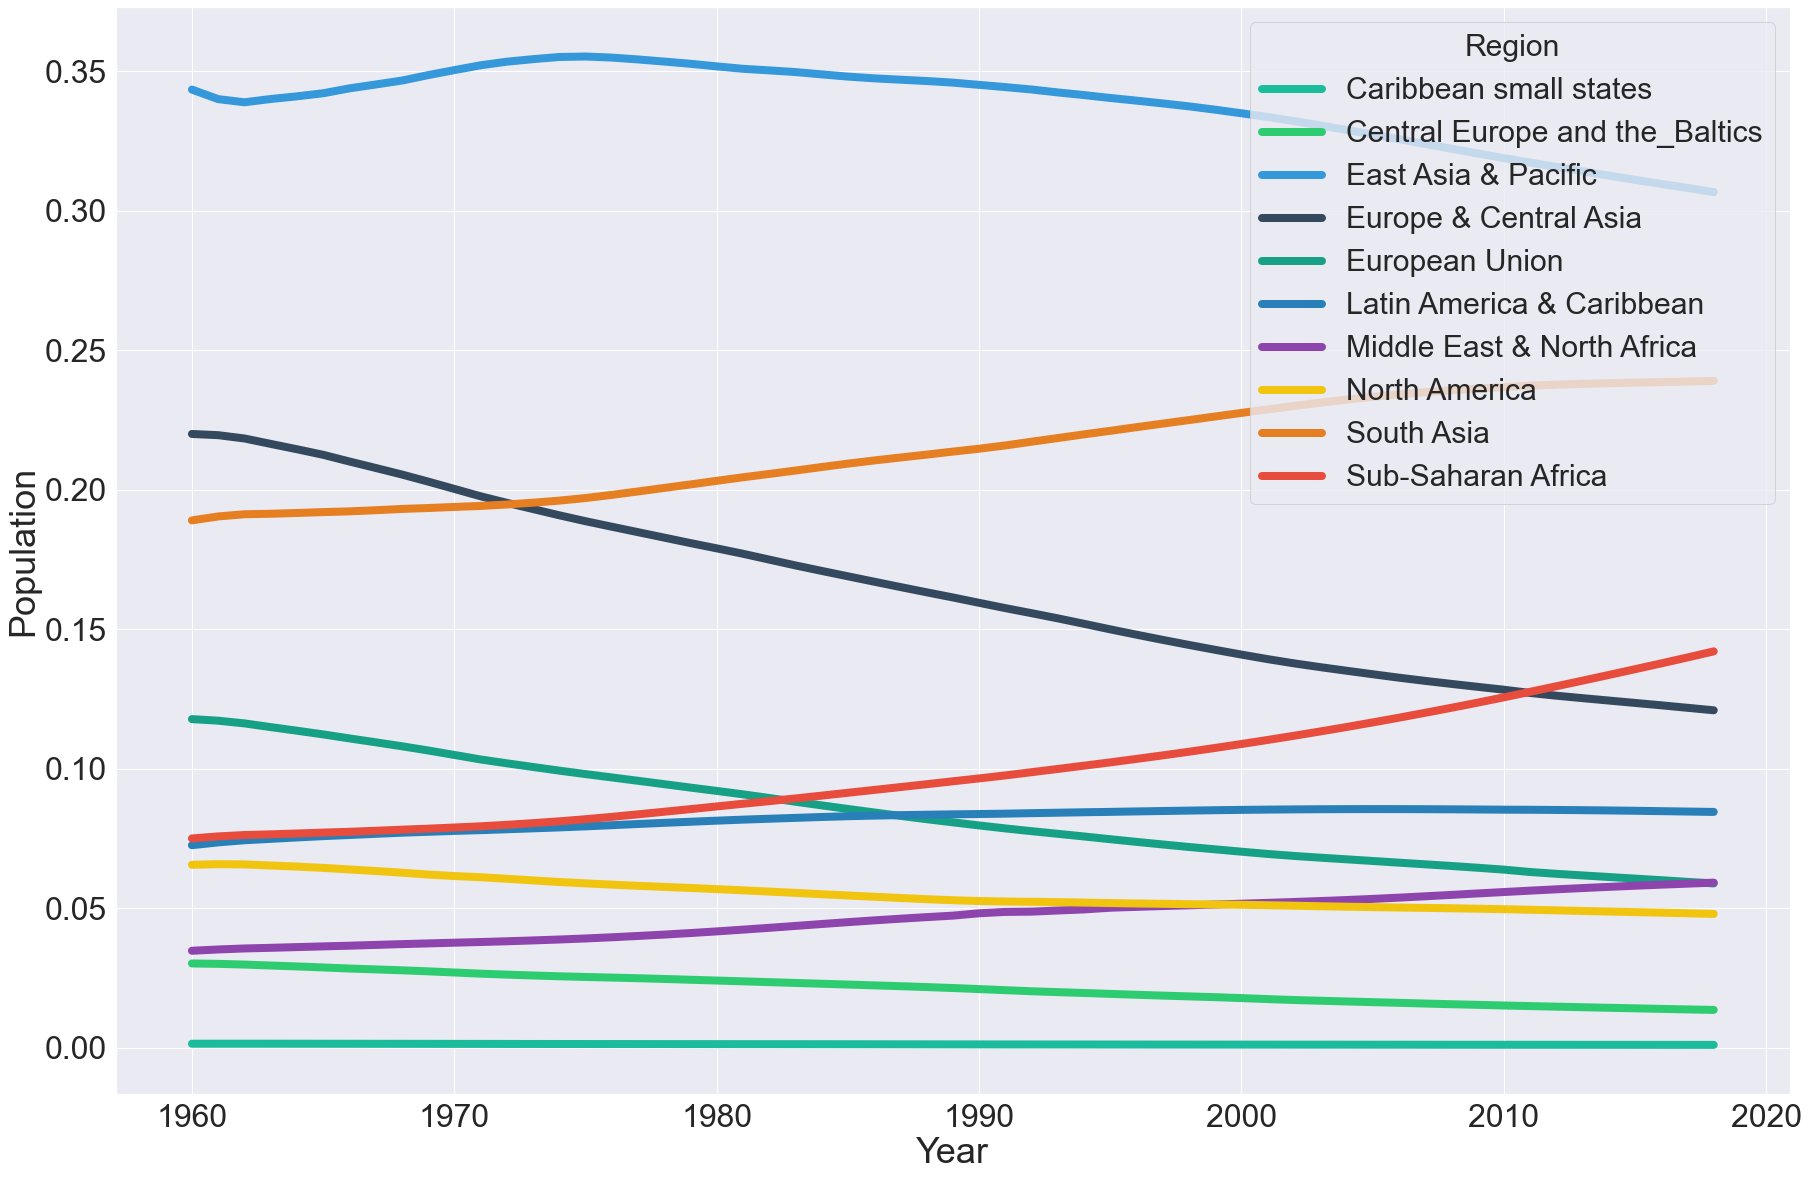

In [20]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
wb_pop2.loc[1960:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Region", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Population', fontsize=36)

## 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [21]:
if not os.path.exists(pathout + 'WB_fert.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'WB_fert.xls')

if not os.path.exists(pathout + 'WB_mort.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'WB_mort.xls')
    
if not os.path.exists(pathout + 'WB_le.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'WB_le.xls')

In [22]:
wb_fert = pd.read_excel(pathout + 'WB_fert.xls', sheet_name="Data", skiprows=3)
wb_fert

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,World,4.980164,5.00261,5.024376,5.044543,5.055467,5.039725,4.990957,4.972429,4.922101,...,2.534292,2.516408,2.498808,2.489385,2.473019,2.465648,2.456264,2.445576,2.428196,2.415032


In [23]:
wb_fert.columns = ['Country Name'] + ['fert_'+str(col) for col in wb_fert.columns[1:]]
wb_fert

,Country Name,fert_1960,fert_1961,fert_1962,fert_1963,fert_1964,fert_1965,fert_1966,fert_1967,fert_1968,...,fert_2009,fert_2010,fert_2011,fert_2012,fert_2013,fert_2014,fert_2015,fert_2016,fert_2017,fert_2018
0,World,4.980164,5.00261,5.024376,5.044543,5.055467,5.039725,4.990957,4.972429,4.922101,...,2.534292,2.516408,2.498808,2.489385,2.473019,2.465648,2.456264,2.445576,2.428196,2.415032


In [24]:
wb_fert = pd.wide_to_long(wb_fert, ['fert_'], i='Country Name', j='year').reset_index() # wide ---> long
wb_fert

,Country Name,year,fert_
0,World,1960,4.980164
1,World,1961,5.002610
2,World,1962,5.024376
3,World,1963,5.044543
4,World,1964,5.055467
5,World,1965,5.039725
6,World,1966,4.990957
7,World,1967,4.972429
8,World,1968,4.922101
9,World,1969,4.855154


In [25]:
wb_fert2 = wb_fert.pivot_table(index='year',columns='Country Name',values='fert_',aggfunc='sum') #otra forma de reshape
wb_fert2

Country Name,World
year,
1960,4.980164
1961,5.002610
1962,5.024376
1963,5.044543
1964,5.055467
1965,5.039725
1966,4.990957
1967,4.972429
1968,4.922101


Text(0, 0.5, 'Fertility Rate')

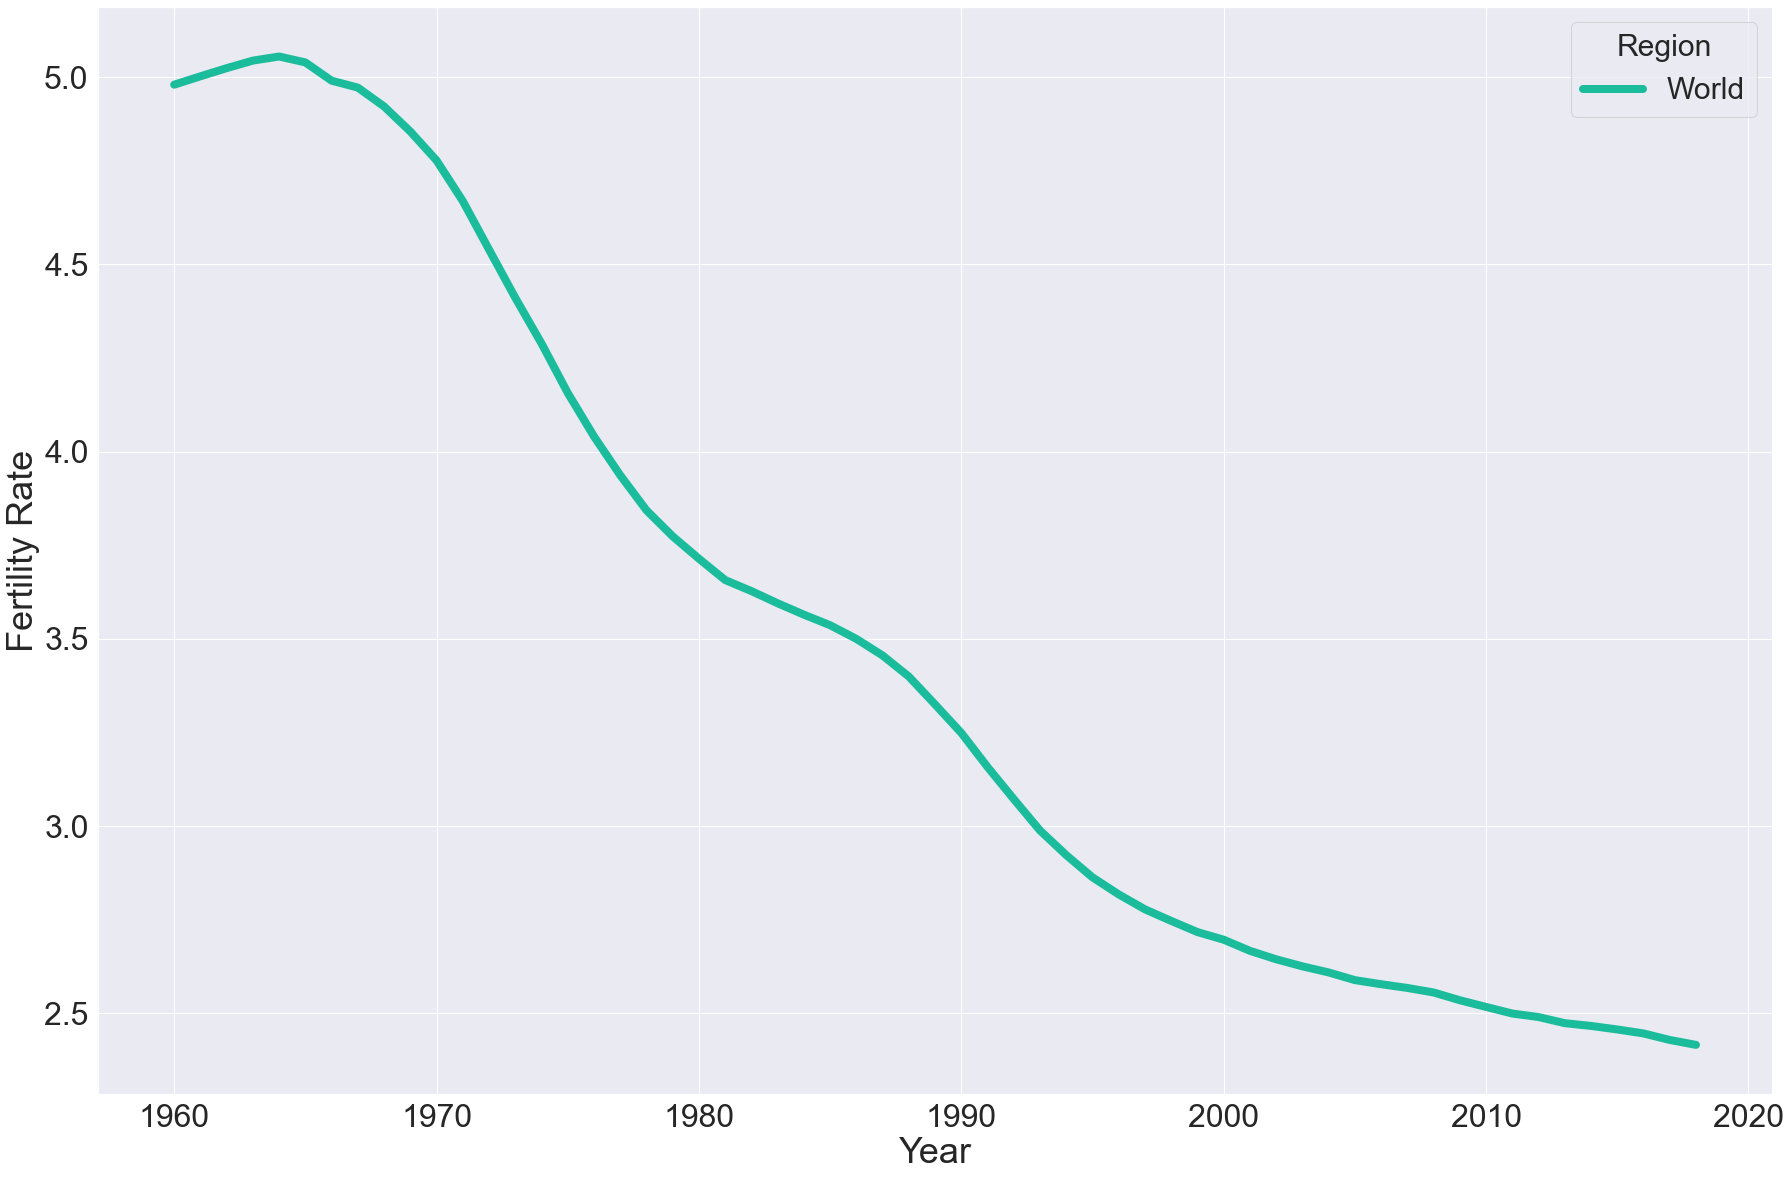

In [26]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
wb_fert2.loc[1960:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Region", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Fertility Rate', fontsize=36)

In [27]:
wb_mort = pd.read_excel(pathout + 'WB_mort.xls', sheet_name="Data", skiprows=3)
wb_mort

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,World,17.714523,14.999311,13.95269,13.735706,13.790592,13.205631,12.863195,12.600419,12.459614,...,7.911923,7.848968,7.767379,7.71746,7.654164,7.59575,7.592618,7.544202,7.540865,7.528492


In [28]:
wb_mort.columns = ['Country Name'] + ['mort_'+str(col) for col in wb_mort.columns[1:]]
wb_mort

,Country Name,mort_1960,mort_1961,mort_1962,mort_1963,mort_1964,mort_1965,mort_1966,mort_1967,mort_1968,...,mort_2009,mort_2010,mort_2011,mort_2012,mort_2013,mort_2014,mort_2015,mort_2016,mort_2017,mort_2018
0,World,17.714523,14.999311,13.95269,13.735706,13.790592,13.205631,12.863195,12.600419,12.459614,...,7.911923,7.848968,7.767379,7.71746,7.654164,7.59575,7.592618,7.544202,7.540865,7.528492


In [29]:
wb_mort = pd.wide_to_long(wb_mort, ['mort_'], i='Country Name', j='year').reset_index() # wide ---> long
wb_mort

,Country Name,year,mort_
0,World,1960,17.714523
1,World,1961,14.999311
2,World,1962,13.952690
3,World,1963,13.735706
4,World,1964,13.790592
5,World,1965,13.205631
6,World,1966,12.863195
7,World,1967,12.600419
8,World,1968,12.459614
9,World,1969,12.266570


In [30]:
wb_mort2 = wb_mort.pivot_table(index='year',columns='Country Name',values='mort_',aggfunc='sum') #otra forma de reshape
wb_mort2

Country Name,World
year,
1960,17.714523
1961,14.999311
1962,13.952690
1963,13.735706
1964,13.790592
1965,13.205631
1966,12.863195
1967,12.600419
1968,12.459614


Text(0, 0.5, 'Mortility Rate')

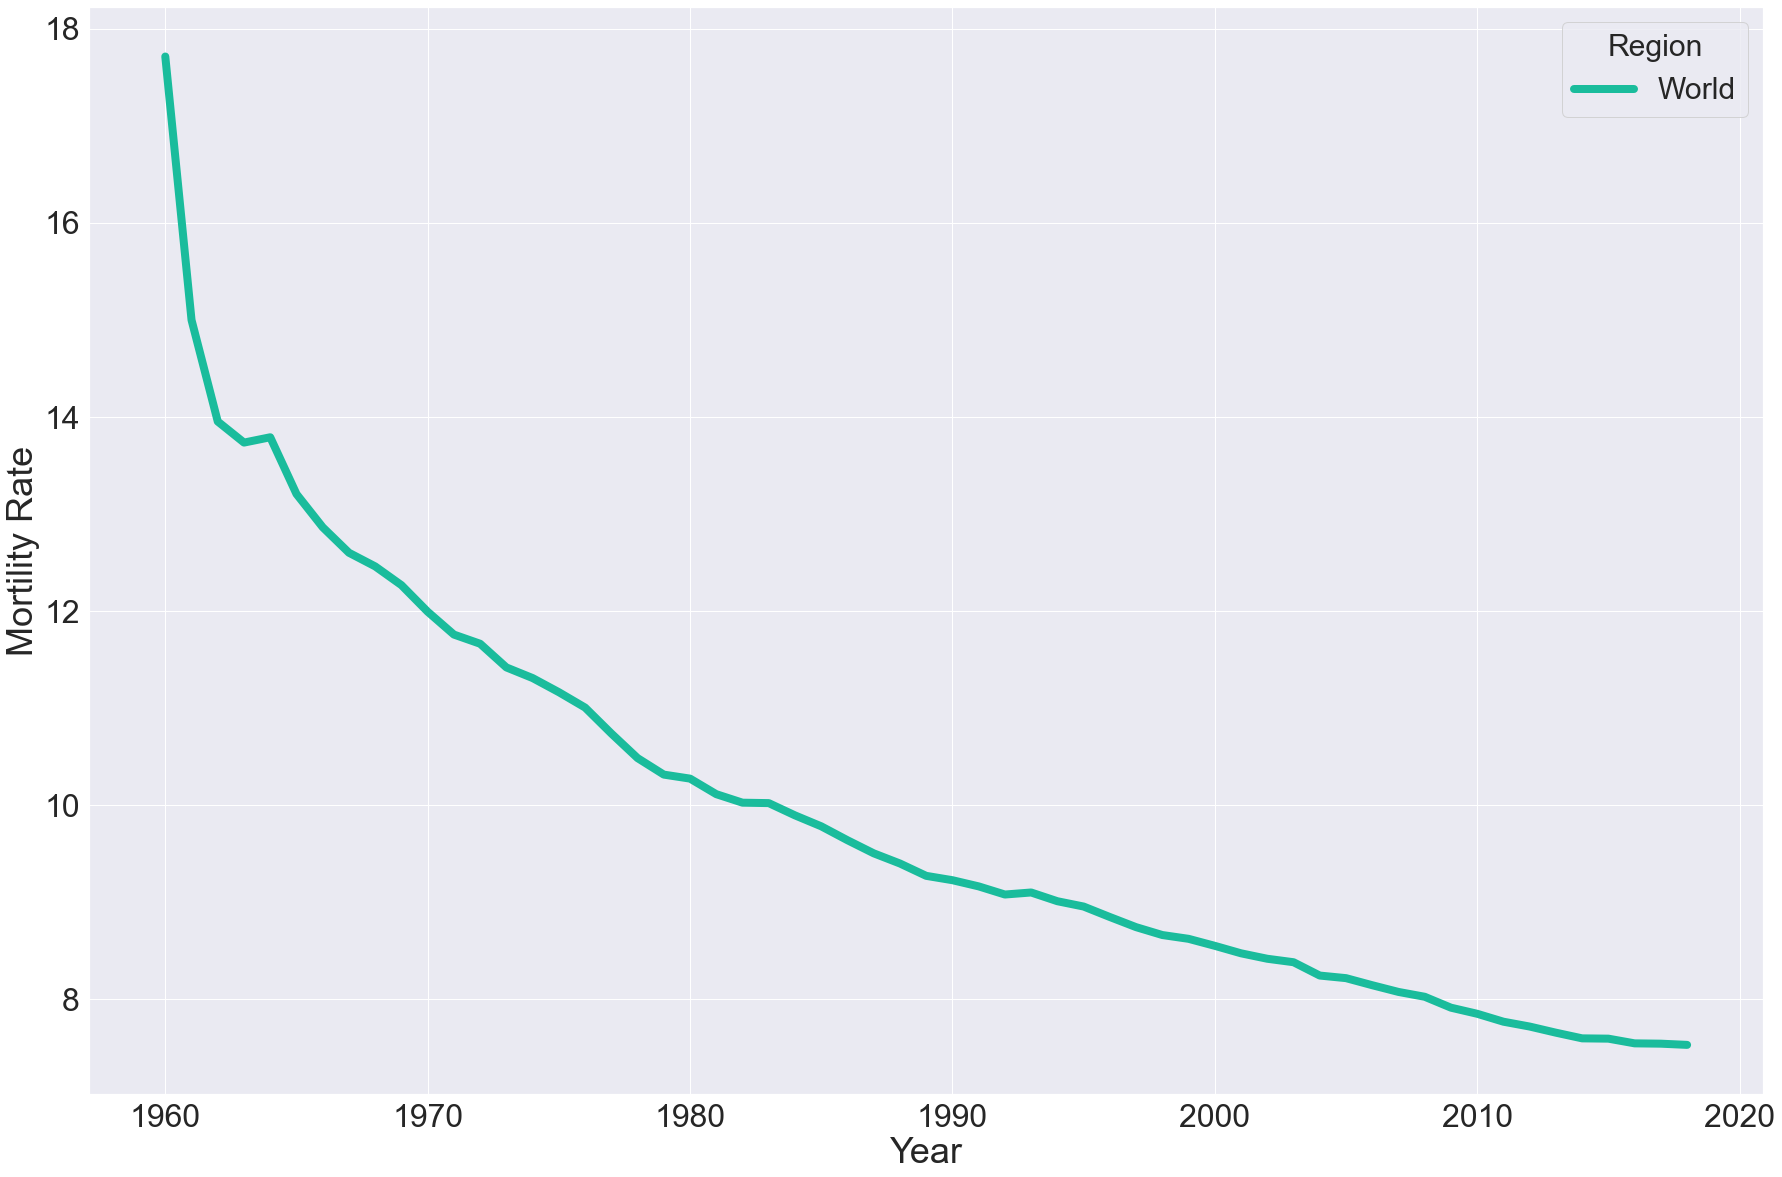

In [31]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
wb_mort2.loc[1960:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Region", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Mortility Rate', fontsize=36)

In [32]:
wb_le = pd.read_excel(pathout + 'WB_le.xls', sheet_name="Data", skiprows=3)
wb_le

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,World,52.578207,53.079382,53.496641,54.021867,54.691761,55.350941,56.082435,56.787124,57.386255,...,70.246578,70.556209,70.884128,71.171724,71.46224,71.74238,71.947523,72.180484,72.385296,72.560056


In [33]:
wb_le.columns = ['Country Name'] + ['le_'+str(col) for col in wb_le.columns[1:]]
wb_le

,Country Name,le_1960,le_1961,le_1962,le_1963,le_1964,le_1965,le_1966,le_1967,le_1968,...,le_2009,le_2010,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018
0,World,52.578207,53.079382,53.496641,54.021867,54.691761,55.350941,56.082435,56.787124,57.386255,...,70.246578,70.556209,70.884128,71.171724,71.46224,71.74238,71.947523,72.180484,72.385296,72.560056


In [34]:
wb_le = pd.wide_to_long(wb_le, ['le_'], i='Country Name', j='year').reset_index() # wide ---> long
wb_le

,Country Name,year,le_
0,World,1960,52.578207
1,World,1961,53.079382
2,World,1962,53.496641
3,World,1963,54.021867
4,World,1964,54.691761
5,World,1965,55.350941
6,World,1966,56.082435
7,World,1967,56.787124
8,World,1968,57.386255
9,World,1969,57.995421


In [35]:
wb_le2 = wb_le.pivot_table(index='year',columns='Country Name',values='le_',aggfunc='sum') #otra forma de reshape
wb_le2

Country Name,World
year,
1960,52.578207
1961,53.079382
1962,53.496641
1963,54.021867
1964,54.691761
1965,55.350941
1966,56.082435
1967,56.787124
1968,57.386255


Text(0, 0.5, 'Life Expentancy')

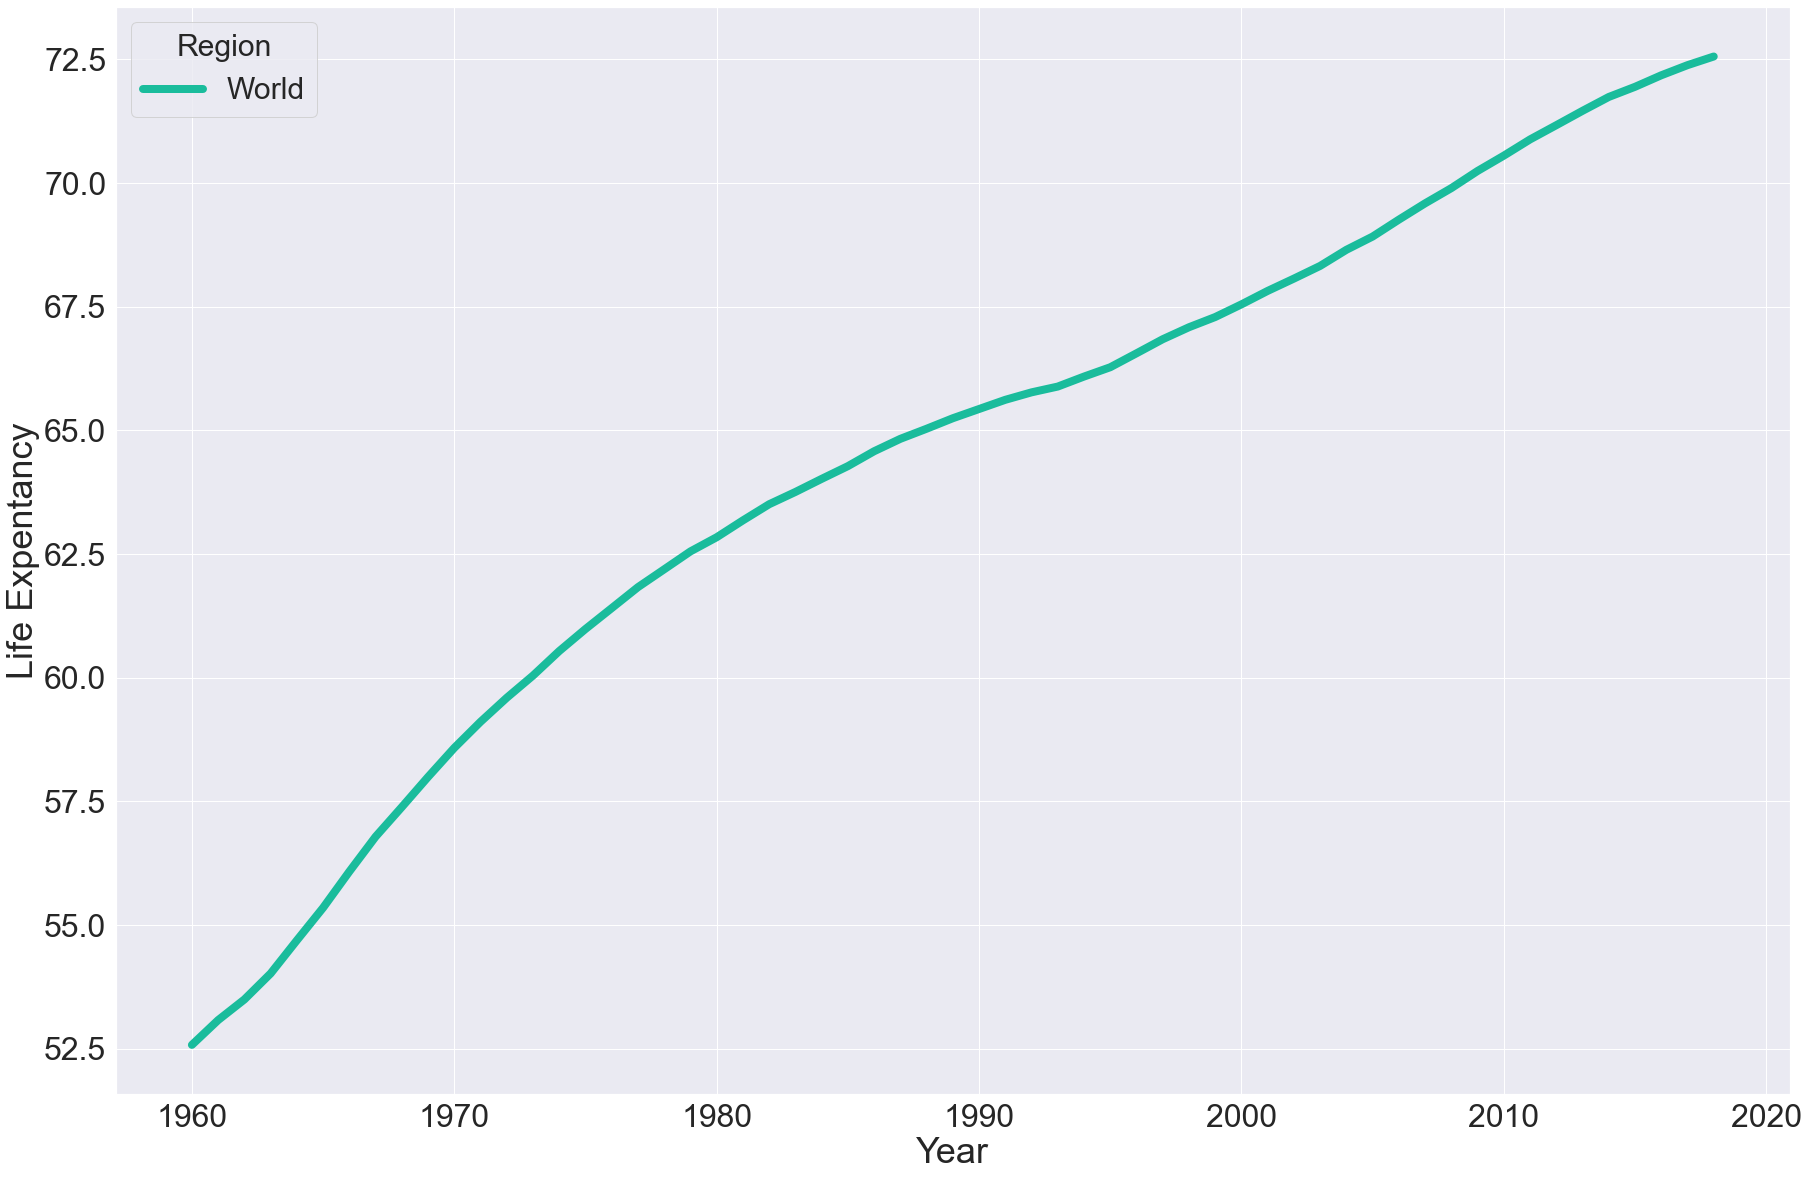

In [36]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
wb_le2.loc[1960:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Region", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Life Expentancy', fontsize=36)

# 4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution

Note: For this part I had problems with the databases being in a .txt file. That is why you will have to use your own computer file location for the code to work.

In [37]:
if not os.path.exists(pathout + 'hdm_le.txt'):
    dataurl2 = "https://www.mortality.org/hmd/USA/STATS/E0per.txt"
    urllib.request.urlretrieve(dataurl2, pathout + 'hdm_le.txt')

In [38]:
hdm_le = pd.read_table('/Users/gusdri1999/Documents/GitHub/CompEcon/notebooks/data1/hdm_le.txt', delim_whitespace=True, names=('Year', 'Male', 'Female','Total'))
hdm_le = hdm_le.drop([0])
hdm_le

,Year,Male,Female,Total
1,1922,58.85,55.18,57.02
2,1923,61.18,57.37,59.30
3,1924,59.98,56.15,58.07
4,1925,60.34,56.49,58.42
5,1926,61.50,57.59,59.56
...,...,...,...,...
91,2012,82.67,78.96,80.86
92,2013,82.77,79.00,80.93
93,2014,82.99,79.25,81.16
94,2015,82.72,79.04,80.91


In [39]:
hdm_le = hdm_le.set_index('Year')
hdm_le = hdm_le.astype({"Male": float, "Female": float, "Total":float})
hdm_le

,Male,Female,Total
Year,,,
1922,58.85,55.18,57.02
1923,61.18,57.37,59.30
1924,59.98,56.15,58.07
1925,60.34,56.49,58.42
1926,61.50,57.59,59.56
...,...,...,...
2012,82.67,78.96,80.86
2013,82.77,79.00,80.93
2014,82.99,79.25,81.16


Text(0, 0.5, 'Life Expentancy')

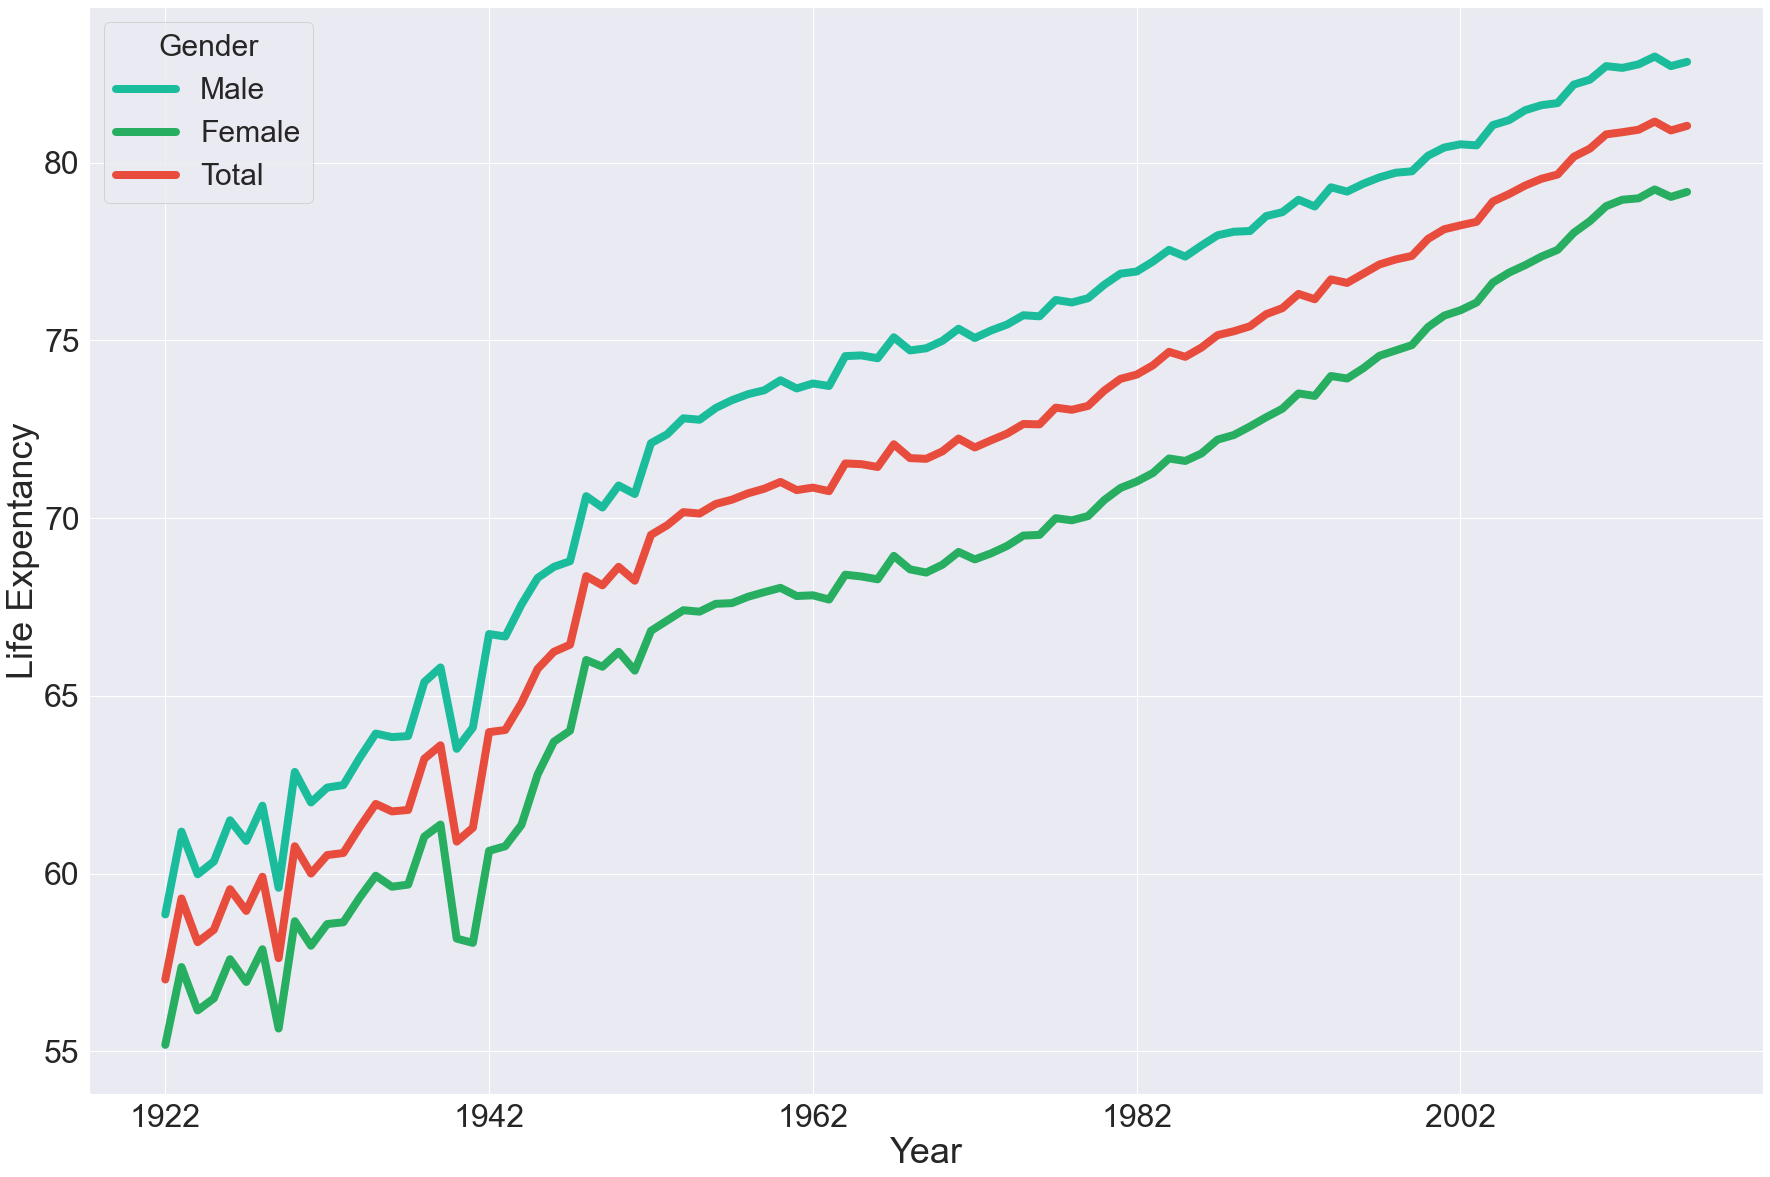

In [40]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
hdm_le.loc["1922":].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Gender", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Life Expentancy', fontsize=36)

In [41]:
if not os.path.exists(pathout + 'hdm_dr.txt'):
    dataurl2 = "https://www.mortality.org/hmd/GBR_NP/STATS/Mx_5x1.txt"
    urllib.request.urlretrieve(dataurl2, pathout + 'hdm_dr.txt')

In [42]:
hdm_dr = pd.read_table('/Users/gusdri1999/Documents/GitHub/CompEcon/notebooks/data1/hdm_dr.txt', delim_whitespace=True, names=('Year', 'Age', 'Male', 'Female','Total'))
hdm_dr = hdm_dr.drop([0])
hdm_dr

,Year,Age,Male,Female,Total
1,1922,0,0.070053,0.092574,0.081500
2,1922,1-4,0.012851,0.013792,0.013327
3,1922,5-9,0.002555,0.002660,0.002608
4,1922,10-14,0.001868,0.001769,0.001818
5,1922,15-19,0.002661,0.002773,0.002716
...,...,...,...,...,...
2276,2016,90-94,0.177667,0.213177,0.189042
2277,2016,95-99,0.287258,0.333672,0.298371
2278,2016,100-104,0.445242,0.501414,0.454413
2279,2016,105-109,0.568770,0.683366,0.581229


In [43]:
hdm_dr = hdm_dr.drop('Male', 1)
hdm_dr = hdm_dr.drop('Female', 1)
hdm_dr

,Year,Age,Total
1,1922,0,0.081500
2,1922,1-4,0.013327
3,1922,5-9,0.002608
4,1922,10-14,0.001818
5,1922,15-19,0.002716
...,...,...,...
2276,2016,90-94,0.189042
2277,2016,95-99,0.298371
2278,2016,100-104,0.454413
2279,2016,105-109,0.581229


In [44]:
hdm_dr2 = hdm_dr.pivot_table(index='Year',columns='Age',values='Total',aggfunc='sum') #otra forma de reshape
hdm_dr2

Age,0,1-4,10-14,100-104,105-109,110+,15-19,20-24,25-29,30-34,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99
Year,,,,,,,,,,,,,,,,,,,,,
1922,0.081500,0.013327,0.001818,0.504054,0.394065,.,0.002716,0.003570,0.003963,0.004557,...,0.012836,0.018606,0.028337,0.043581,0.069934,0.110051,0.162535,0.239398,0.324770,0.463116
1923,0.073306,0.009546,0.001666,0.619372,1.011029,.,0.002573,0.003251,0.003598,0.003988,...,0.011688,0.017260,0.026216,0.040163,0.063624,0.099434,0.149024,0.225777,0.295485,0.397459
1924,0.080602,0.010681,0.001713,0.577847,1.617783,.,0.002616,0.003324,0.003596,0.004075,...,0.012117,0.017790,0.027339,0.042428,0.068439,0.107026,0.159474,0.233445,0.321043,0.427568
1925,0.080413,0.010062,0.001716,0.625754,1.569859,.,0.002650,0.003241,0.003566,0.003897,...,0.011931,0.017373,0.026316,0.041358,0.066440,0.106073,0.157804,0.238684,0.325378,0.452937
1926,0.075389,0.008784,0.001548,0.627738,0.880288,.,0.002481,0.003078,0.003442,0.003728,...,0.011459,0.016711,0.025290,0.039795,0.063374,0.101001,0.149580,0.229989,0.306833,0.399382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.004141,0.000165,0.000095,0.465999,0.620279,0.783971,0.000244,0.000358,0.000458,0.000628,...,0.003159,0.005084,0.007985,0.012324,0.020890,0.035025,0.062879,0.111891,0.189557,0.316355
2013,0.003857,0.000172,0.000095,0.461682,0.648309,0.798098,0.000240,0.000347,0.000458,0.000644,...,0.003163,0.005062,0.007986,0.012184,0.020468,0.034574,0.062483,0.111379,0.191959,0.314356
2014,0.003858,0.000157,0.000096,0.434923,0.599584,1.166648,0.000248,0.000372,0.000463,0.000635,...,0.003115,0.004908,0.007880,0.011907,0.019985,0.033675,0.060230,0.107487,0.185714,0.297437


In [45]:
hdm_dr2 = hdm_dr2.drop('110+', 1)
hdm_dr2

Age,0,1-4,10-14,100-104,105-109,15-19,20-24,25-29,30-34,35-39,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99
Year,,,,,,,,,,,,,,,,,,,,,
1922,0.081500,0.013327,0.001818,0.504054,0.394065,0.002716,0.003570,0.003963,0.004557,0.005648,...,0.012836,0.018606,0.028337,0.043581,0.069934,0.110051,0.162535,0.239398,0.324770,0.463116
1923,0.073306,0.009546,0.001666,0.619372,1.011029,0.002573,0.003251,0.003598,0.003988,0.004995,...,0.011688,0.017260,0.026216,0.040163,0.063624,0.099434,0.149024,0.225777,0.295485,0.397459
1924,0.080602,0.010681,0.001713,0.577847,1.617783,0.002616,0.003324,0.003596,0.004075,0.005185,...,0.012117,0.017790,0.027339,0.042428,0.068439,0.107026,0.159474,0.233445,0.321043,0.427568
1925,0.080413,0.010062,0.001716,0.625754,1.569859,0.002650,0.003241,0.003566,0.003897,0.004907,...,0.011931,0.017373,0.026316,0.041358,0.066440,0.106073,0.157804,0.238684,0.325378,0.452937
1926,0.075389,0.008784,0.001548,0.627738,0.880288,0.002481,0.003078,0.003442,0.003728,0.004760,...,0.011459,0.016711,0.025290,0.039795,0.063374,0.101001,0.149580,0.229989,0.306833,0.399382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.004141,0.000165,0.000095,0.465999,0.620279,0.000244,0.000358,0.000458,0.000628,0.000913,...,0.003159,0.005084,0.007985,0.012324,0.020890,0.035025,0.062879,0.111891,0.189557,0.316355
2013,0.003857,0.000172,0.000095,0.461682,0.648309,0.000240,0.000347,0.000458,0.000644,0.000957,...,0.003163,0.005062,0.007986,0.012184,0.020468,0.034574,0.062483,0.111379,0.191959,0.314356
2014,0.003858,0.000157,0.000096,0.434923,0.599584,0.000248,0.000372,0.000463,0.000635,0.000938,...,0.003115,0.004908,0.007880,0.011907,0.019985,0.033675,0.060230,0.107487,0.185714,0.297437


In [46]:
hdm_dr2 = hdm_dr2.astype({"0":float,"1-4":float,"40-44":float, "10-14":float, "100-104":float, "105-109":float, "15-19":float, "20-24":float, "25-29":float, "30-34":float, "35-39":float, "50-54":float, "55-59":float, "5-9":float, "60-64":float, "65-69":float, "70-74":float, "75-79":float, "80-84":float, "85-89":float, "90-94":float, "95-99":float})
hdm_dr2 = hdm_dr2.drop('105-109', 1)
hdm_dr2 = hdm_dr2.drop('100-104', 1)
hdm_dr2

Age,0,1-4,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99
Year,,,,,,,,,,,,,,,,,,,,,
1922,0.081500,0.013327,0.001818,0.002716,0.003570,0.003963,0.004557,0.005648,0.006817,0.009065,...,0.012836,0.018606,0.028337,0.043581,0.069934,0.110051,0.162535,0.239398,0.324770,0.463116
1923,0.073306,0.009546,0.001666,0.002573,0.003251,0.003598,0.003988,0.004995,0.006243,0.008477,...,0.011688,0.017260,0.026216,0.040163,0.063624,0.099434,0.149024,0.225777,0.295485,0.397459
1924,0.080602,0.010681,0.001713,0.002616,0.003324,0.003596,0.004075,0.005185,0.006478,0.008696,...,0.012117,0.017790,0.027339,0.042428,0.068439,0.107026,0.159474,0.233445,0.321043,0.427568
1925,0.080413,0.010062,0.001716,0.002650,0.003241,0.003566,0.003897,0.004907,0.006310,0.008612,...,0.011931,0.017373,0.026316,0.041358,0.066440,0.106073,0.157804,0.238684,0.325378,0.452937
1926,0.075389,0.008784,0.001548,0.002481,0.003078,0.003442,0.003728,0.004760,0.006095,0.008265,...,0.011459,0.016711,0.025290,0.039795,0.063374,0.101001,0.149580,0.229989,0.306833,0.399382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.004141,0.000165,0.000095,0.000244,0.000358,0.000458,0.000628,0.000913,0.001385,0.002070,...,0.003159,0.005084,0.007985,0.012324,0.020890,0.035025,0.062879,0.111891,0.189557,0.316355
2013,0.003857,0.000172,0.000095,0.000240,0.000347,0.000458,0.000644,0.000957,0.001429,0.002078,...,0.003163,0.005062,0.007986,0.012184,0.020468,0.034574,0.062483,0.111379,0.191959,0.314356
2014,0.003858,0.000157,0.000096,0.000248,0.000372,0.000463,0.000635,0.000938,0.001442,0.002089,...,0.003115,0.004908,0.007880,0.011907,0.019985,0.033675,0.060230,0.107487,0.185714,0.297437


Text(0, 0.5, 'Death Rates')

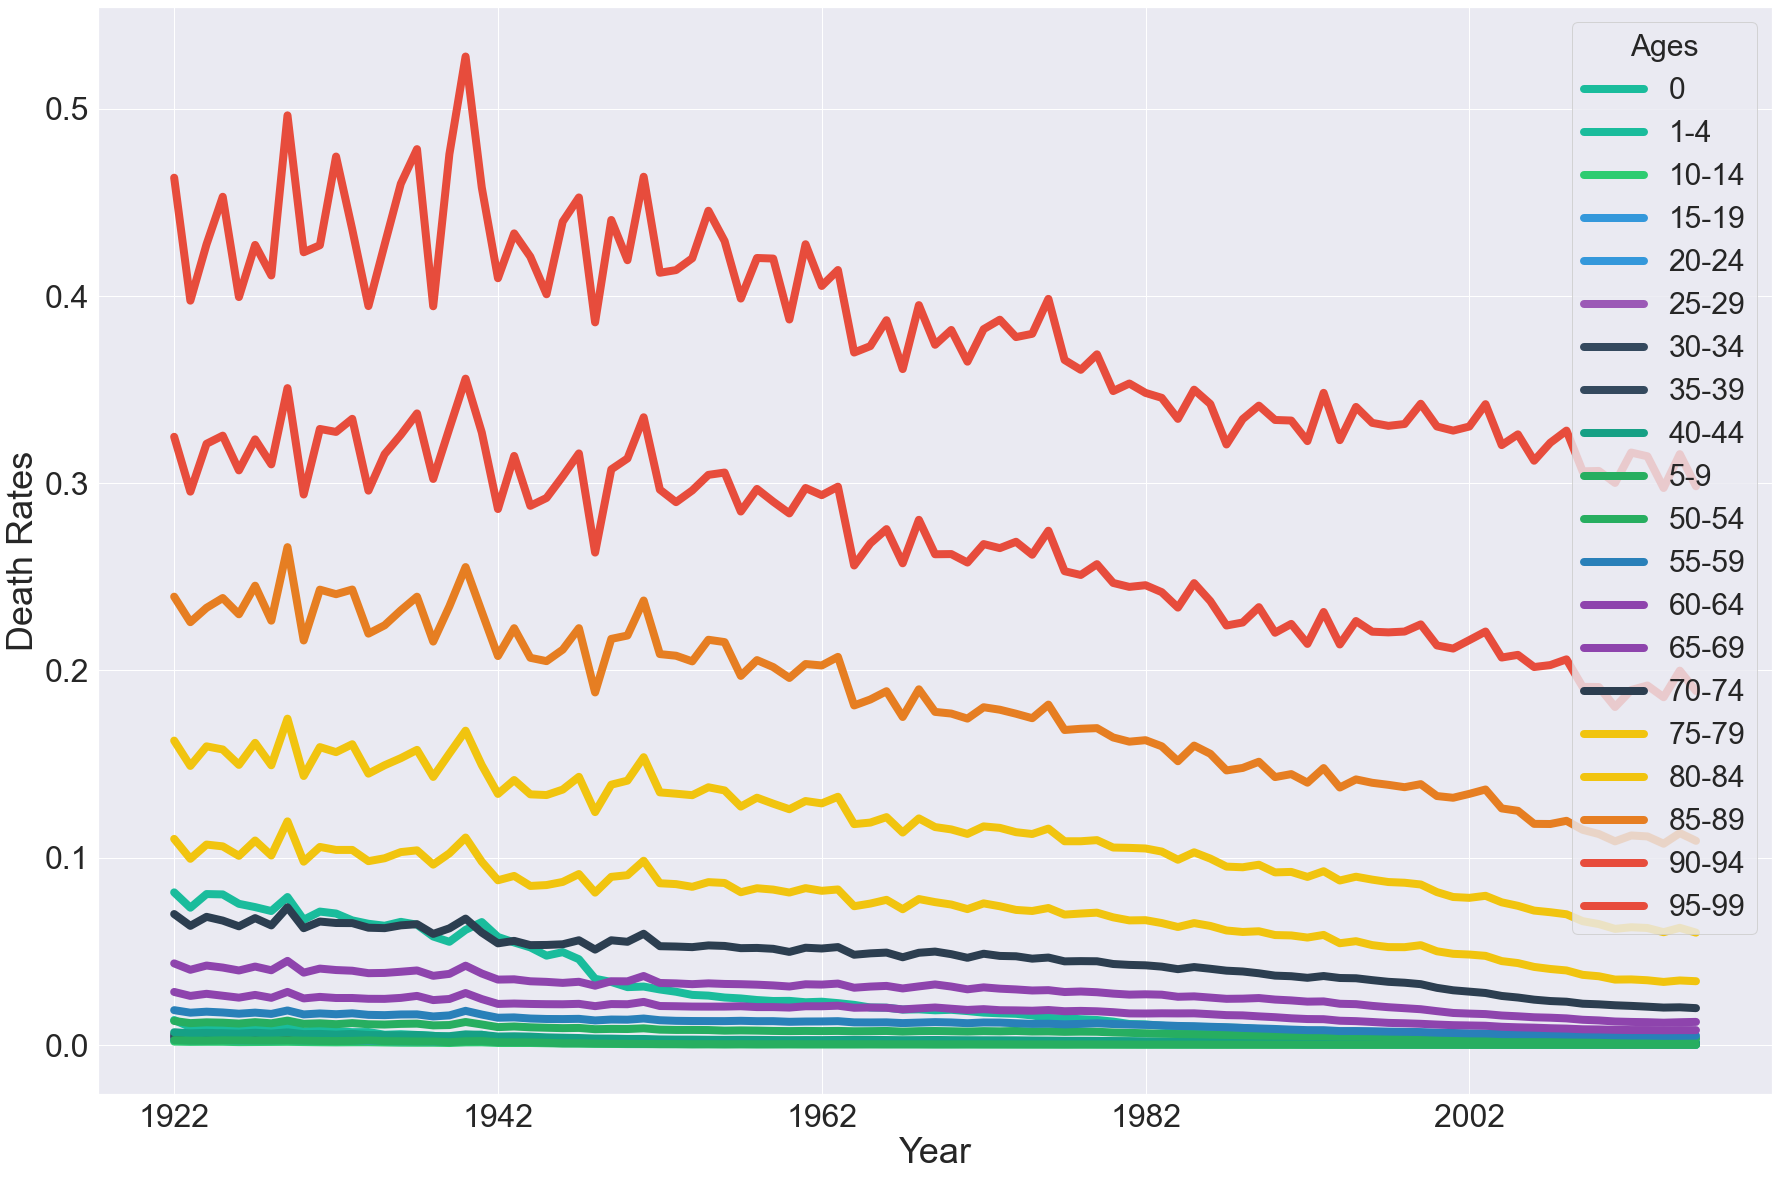

In [47]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
hdm_dr2.loc["1922":].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Ages", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Death Rates', fontsize=36)

# 5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Given all the plots done before, we can observe that all what theory and empirical analysis has proved about the modern growth epoch and its effects on population growth is certainly true. What we had studied during the entire class dictates that we have gone through a demographic transition that consists on a decline on both fertility and mortality rate and a growth on life expectnancy. This is due to the advancements in life qualityand medicine and the new tendency to have less children than before. We can also see that population is suffering a huge divergence depending on the zone where we stand. That divergence is due to the fact that the demographic transition came later in some countries.